In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mnist = fetch_openml("mnist_784")

## Analizar data

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [ ]:
mnist['data'].shape

(70000, 784)

In [ ]:
mnist['target'].shape

(70000,)

In [ ]:
image = mnist['data'][0,:]   # Extrae la primera imagen (fila 1)
mnist['data'][0,:].shape

(784,)

In [ ]:
image = image.reshape(28, 28)  # Cambia la forma del array a 28x28

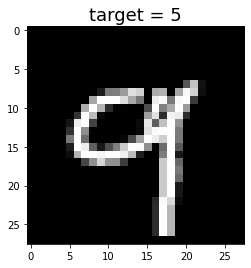

In [ ]:
plt.figure(figsize=(8,4))
plt.imshow(image, cmap = 'gray')
plt.title(f"target = {mnist['target'][0]}", size = 18)
plt.show()

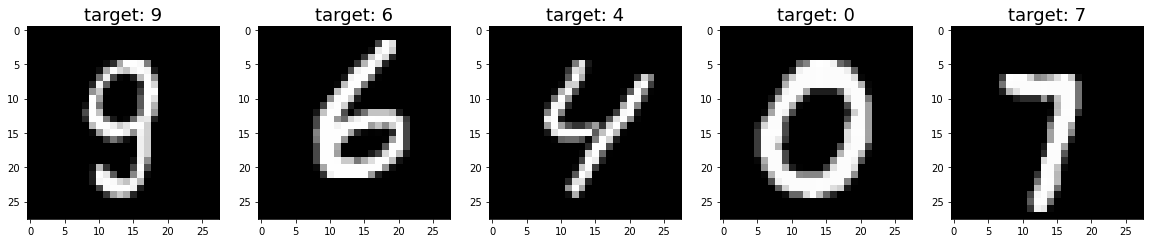

In [ ]:
# Muestra 5 imagenes aleatorias
idx = np.random.randint(mnist['data'].shape[0]-5)
plt.figure(figsize=(20,4)) 
for index, (image, label) in enumerate(zip(mnist['data'][idx:idx+5], mnist['target'][idx:idx+5])):  
   plt.subplot(1,5,index + 1)
   plt.title(f"target: {label}", size = 18)
   plt.imshow(image.reshape(28,28), cmap = 'gray')

In [ ]:
np.max(mnist['data'][11])     # El valor de cada pixel va de 0-255

255.0

## Aplicar Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist['data'], mnist['target'], test_size=0.2, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56000, 784), (14000, 784), (56000,), (14000,))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
modelo = LogisticRegression()

In [ ]:
modelo.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predecir las primeras 10 imagenes

In [ ]:
X_test[:10].shape

(10, 784)

In [ ]:
modelo.predict(X_test[:10])       # El clasificador se equivocó en predecir 7 en vez de 4 y 9 en vez de 7

array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '7'], dtype=object)

In [ ]:
y_test[:10]  

array(['0', '4', '1', '2', '7', '9', '7', '1', '1', '7'], dtype=object)

## Precision del clasificador

In [ ]:
score = modelo.score(X_test, y_test)  
score

0.9172142857142858

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = modelo.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
import seaborn as sbn

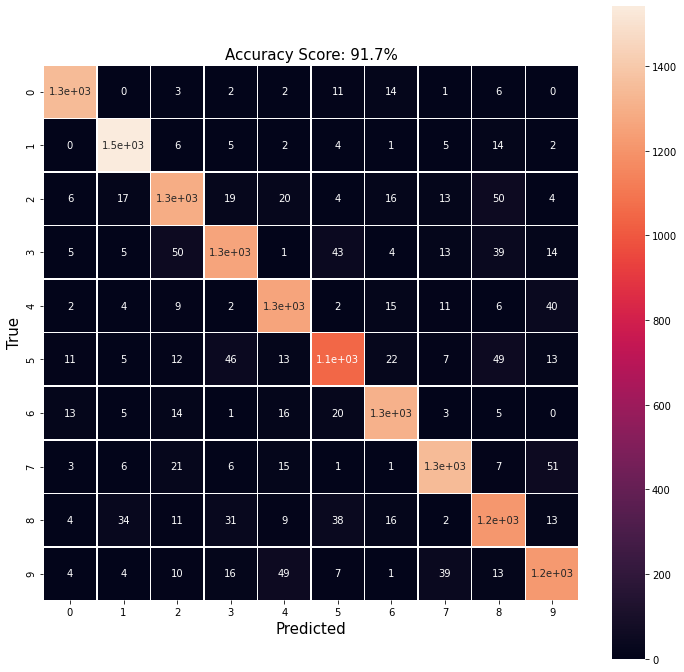

In [ ]:
plt.figure(figsize=(12,12))
sbn.heatmap(cm, annot = True, linewidths = .5, square = True);
plt.xlabel('Predicted', size = 15)                                       # El eje x son los predichos
plt.ylabel('True', size = 15)                                            # El eje y seran los valores verdaderos
plt.title(f'Accuracy Score: {np.round(100*score,1)}%', size = 15)
plt.show()